<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.208373,-0.002646,109.205728,109.208488,-0.002760
1,0.0,1.0,41.220114,0.010462,51.230577,51.222533,0.008043
2,0.0,2.0,39.347086,0.015409,49.362494,49.349579,0.012915
3,0.0,3.0,72.980639,0.002357,82.982996,82.981795,0.001201
4,0.0,4.0,91.351430,-0.000494,101.350935,101.351856,-0.000921
...,...,...,...,...,...,...,...
29995,999.0,25.0,65.347203,0.001781,75.348984,75.348117,0.000867
29996,999.0,26.0,94.753280,0.000326,104.753607,104.755294,-0.001687
29997,999.0,27.0,36.143153,-0.044108,46.099045,46.142975,-0.043930
29998,999.0,28.0,45.008970,-0.016182,54.992787,55.009124,-0.016336


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    99.208373 -0.002646  109.205728  109.208488 -0.002760
      1.0    41.220114  0.010462   51.230577   51.222533  0.008043
      2.0    39.347086  0.015409   49.362494   49.349579  0.012915
      3.0    72.980639  0.002357   82.982996   82.981795  0.001201
      4.0    91.351430 -0.000494  101.350935  101.351856 -0.000921
...                ...       ...         ...         ...       ...
999.0 25.0   65.347203  0.001781   75.348984   75.348117  0.000867
      26.0   94.753280  0.000326  104.753607  104.755294 -0.001687
      27.0   36.143153 -0.044108   46.099045   46.142975 -0.043930
      28.0   45.008970 -0.016182   54.992787   55.009124 -0.016336
      29.0   35.727270 -0.013716   45.713555   45.727077 -0.013523

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    99.208373 -0.002646  109.205728  109.208488 -0.002760
      1.0    41.220114  0.010462   51.230577   51.222533  0.008043
      2.0    39.347086  0.015409   49.362494   49.349579  0.012915
      3.0    72.980639  0.002357   82.982996   82.981795  0.001201
      4.0    91.351430 -0.000494  101.350935  101.351856 -0.000921
...                ...       ...         ...         ...       ...
999.0 25.0   65.347203  0.001781   75.348984   75.348117  0.000867
      26.0   94.753280  0.000326  104.753607  104.755294 -0.001687
      27.0   36.143153 -0.044108   46.099045   46.142975 -0.043930
      28.0   45.008970 -0.016182   54.992787   55.009124 -0.016336
      29.0   35.727270 -0.013716   45.713555   45.727077 -0.013523

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.208373,-0.002646,109.205728,109.208488,-0.002760
1,0.0,1.0,41.220114,0.010462,51.230577,51.222533,0.008043
2,0.0,2.0,39.347086,0.015409,49.362494,49.349579,0.012915
3,0.0,3.0,72.980639,0.002357,82.982996,82.981795,0.001201
4,0.0,4.0,91.351430,-0.000494,101.350935,101.351856,-0.000921
...,...,...,...,...,...,...,...
29995,999.0,25.0,65.347203,0.001781,75.348984,75.348117,0.000867
29996,999.0,26.0,94.753280,0.000326,104.753607,104.755294,-0.001687
29997,999.0,27.0,36.143153,-0.044108,46.099045,46.142975,-0.043930
29998,999.0,28.0,45.008970,-0.016182,54.992787,55.009124,-0.016336


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    99.208373 -0.002646  109.205728  109.208488 -0.002760
      1.0    41.220114  0.010462   51.230577   51.222533  0.008043
      2.0    39.347086  0.015409   49.362494   49.349579  0.012915
      3.0    72.980639  0.002357   82.982996   82.981795  0.001201
      4.0    91.351430 -0.000494  101.350935  101.351856 -0.000921
...                ...       ...         ...         ...       ...
999.0 25.0   65.347203  0.001781   75.348984   75.348117  0.000867
      26.0   94.753280  0.000326  104.753607  104.755294 -0.001687
      27.0   36.143153 -0.044108   46.099045   46.142975 -0.043930
      28.0   45.008970 -0.016182   54.992787   55.009124 -0.016336
      29.0   35.727270 -0.013716   45.713555   45.727077 -0.013523

[30000 rows x 5 columns]

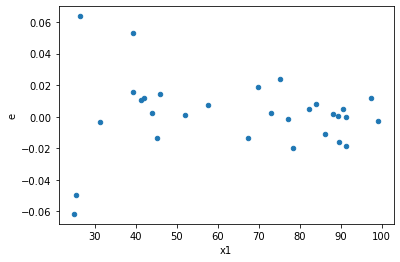

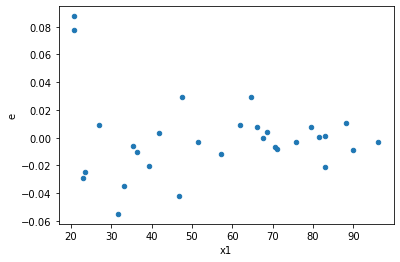

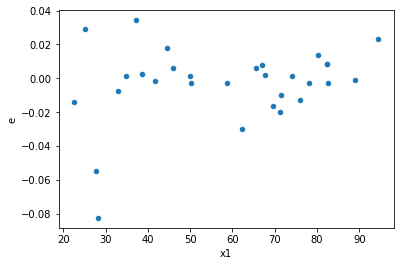

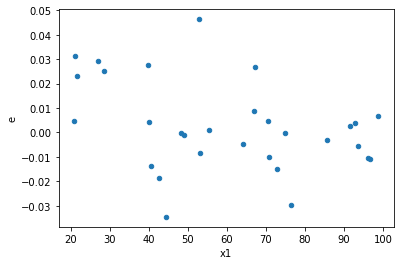

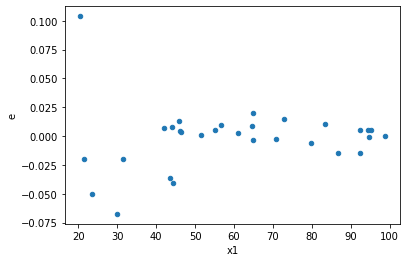

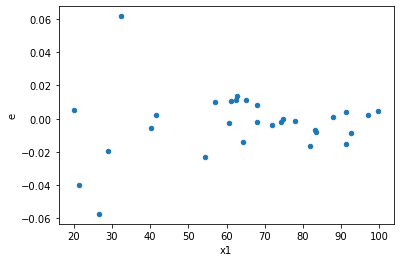

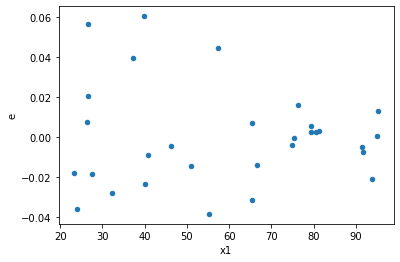

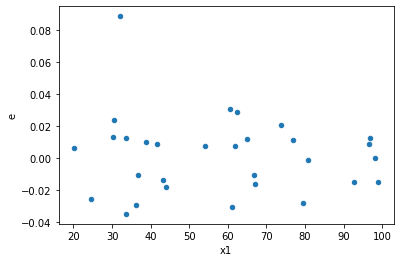

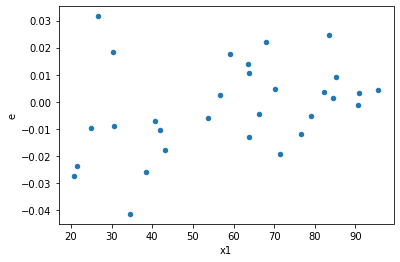

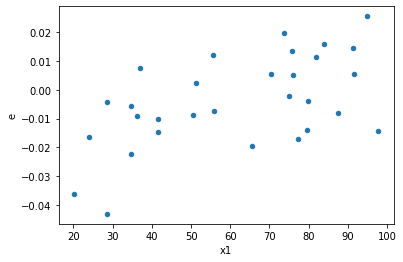

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,22.0,6.0,0.0021182421477919716,0.007822739677629647,9.628373399054417e-05,0.0013037899462716078,13.541123637764718,0.0037944280071045,0.9981027859964477,0.00189721400355225,Reject001=0 : Heteroscedasticity
7.0,15.0,13.0,0.005125180575722489,0.012108013993428859,0.00034167870504816594,0.00093138569180222,2.725910857309424,0.07678859967444862,0.9616057001627757,0.03839429983722431,Reject001=1 : Homoscedasticity
13.0,14.0,14.0,0.0025494422340946303,0.00813741996818532,0.00018210301672104501,0.0005812442834418086,3.191843242949617,0.037690845722628374,0.9811545771386858,0.018845422861314187,Reject001=1 : Homoscedasticity
14.0,12.0,16.0,0.0010604601398679265,0.02209852137898374,8.83716783223272e-05,0.0013811575861864837,15.62896181680339,2.6137596309538935e-06,0.9999986931201845,1.3068798154769468e-06,Reject001=0 : Heteroscedasticity
18.0,19.0,9.0,0.001744069451454266,0.004536187153401096,9.179312902390874e-05,0.000504020794822344,5.490833575256652,0.012699716261861171,0.9936501418690694,0.006349858130930586,Reject001=1 : Homoscedasticity
19.0,13.0,15.0,0.0021946382170230996,0.00922125456747943,0.00016881832438639228,0.0006147503044986286,3.6414903816459216,0.0192559064475315,0.9903720467762342,0.00962795322376575,Reject001=1 : Homoscedasticity
20.0,14.0,14.0,0.0017673313594980986,0.010461897727259906,0.00012623795424986418,0.0007472784090899933,5.9196017040239495,0.0020180667846436684,0.9989909666076782,0.0010090333923218342,Reject001=0 : Heteroscedasticity
22.0,17.0,11.0,0.002134982918952502,0.004343767903287182,0.00012558723052661776,0.00039488799120792565,3.1443323461474897,0.05826625164646737,0.9708668741767663,0.029133125823233685,Reject001=1 : Homoscedasticity
25.0,7.0,21.0,0.0006727674490023292,0.019500070100596123,9.610963557176131e-05,0.0009285747666950535,9.661619890356603,4.652087464984689e-05,0.9999767395626751,2.3260437324923444e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,16.0,0.01308687720805898,0.002474488156266821,0.0010905731006715816,0.00015465550976667632,0.14181122720837191,0.0014891891769749062,Reject001=0 : Heteroscedasticity
1.0,13.0,15.0,0.02027857069803169,0.0018817328391752563,0.0015598900536947455,0.00012544885594501708,0.08042160128393647,4.766840824980394e-05,Reject001=0 : Heteroscedasticity
2.0,12.0,16.0,0.010471302888910669,0.0019879709919724056,0.0008726085740758891,0.00012424818699827535,0.14238708017493043,0.0015188108250544137,Reject001=0 : Heteroscedasticity
3.0,14.0,14.0,0.005949051651519923,0.002246083585724035,0.0004249322608228517,0.00016043454183743109,0.3775532164273919,0.07890904321841763,Reject001=1 : Homoscedasticity
4.0,15.0,13.0,0.021694328582166106,0.0011302430684098474,0.0014462885721444072,8.694177449306519e-05,0.060113711860529266,2.74397324455703e-06,Reject001=0 : Heteroscedasticity
5.0,22.0,6.0,0.0021182421477919716,0.007822739677629647,9.628373399054417e-05,0.0013037899462716078,13.541123637764718,0.0037944280071045,Reject001=0 : Heteroscedasticity
6.0,14.0,14.0,0.015820968336272164,0.0021114747144709393,0.0011300691668765831,0.00015081962246220996,0.1334605233758061,0.0005626591015796645,Reject001=0 : Heteroscedasticity
7.0,15.0,13.0,0.005125180575722489,0.012108013993428859,0.00034167870504816594,0.00093138569180222,2.725910857309424,0.07678859967444862,Reject001=1 : Homoscedasticity
8.0,11.0,17.0,0.00434546744181595,0.0023863129342004763,0.0003950424947105409,0.00014037134907061625,0.35533227678068,0.08551227000698791,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    543
Reject001=1 : Homoscedasticity      457
Name: Result_test, dtype: int64